In [3]:
#  Resumo da Análise - O futuro automobilisto e o preço dos carros
# O objetivo desta análise é entender os fatores que influenciam o preço dos carros e identificar padrões nos dados.
# Para isso, faremos uma limpeza inicial para remover valores inconsistentes, lidar com dados ausentes e padronizar os formatos das variáveis.
#As perguntas que queremos responder com esta analise sao:

# 1.Como o ano de fabricação impacta o preço do carro?
# 2. Qual é a relação entre a quilometragem e o preço?
# 3. O número de donos anteriores afeta o preço de revenda?

#Assim, queremos prever o preço dos carros para os próximos anos. O dataset escolhido foi o car_price_dataset e ele foi encontrado no Kaggle.

In [4]:
import pandas as pd

In [5]:
# Carregar o dataset
from google.colab import files
uploaded = files.upload()

Saving car_price_dataset.csv to car_price_dataset.csv


In [6]:
# Carregar o arquivo CSV no DataFrame
df = pd.read_csv("car_price_dataset.csv")

In [7]:
# Exibir as primeiras linhas
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [8]:
# Verificando valores ausentes
missing_values = df.isnull().sum()

In [9]:
# Estatísticas básicas
summary_stats = df.describe()

missing_values, summary_stats

(Brand           0
 Model           0
 Year            0
 Engine_Size     0
 Fuel_Type       0
 Transmission    0
 Mileage         0
 Doors           0
 Owner_Count     0
 Price           0
 dtype: int64,
                Year   Engine_Size        Mileage         Doors   Owner_Count  \
 count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
 mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
 std        6.897699      1.149324   86322.348957      1.110097      1.422682   
 min     2000.000000      1.000000      25.000000      2.000000      1.000000   
 25%     2006.000000      2.000000   74649.250000      3.000000      2.000000   
 50%     2012.000000      3.000000  149587.000000      3.000000      3.000000   
 75%     2017.000000      4.000000  223577.500000      4.000000      4.000000   
 max     2023.000000      5.000000  299947.000000      5.000000      5.000000   
 
              Price  
 count  10000.00000  
 mean    8852.96440 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Configuração do estilo dos gráficos
sns.set(style="whitegrid")

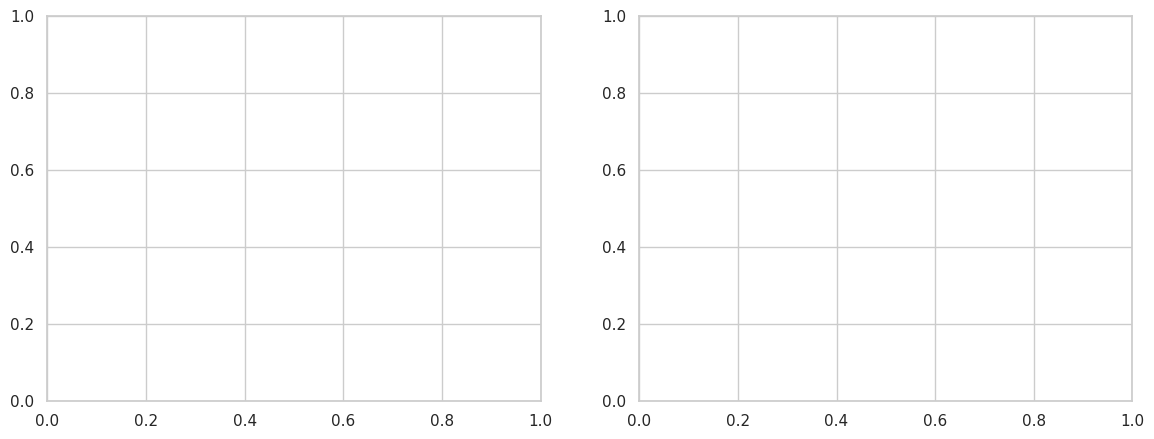

In [12]:
# Criando gráficos de boxplot para identificar outliers
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

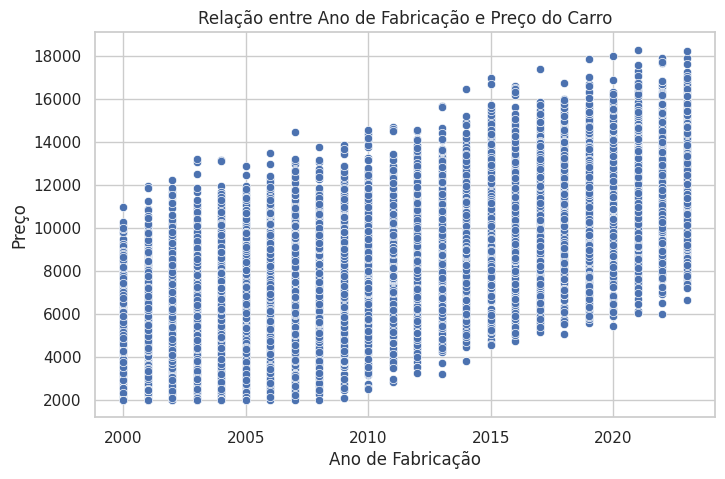

In [28]:
# 1.Como o ano de fabricação impacta o preço do carro?
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Year', y='Price', data=df)
plt.title('Relação entre Ano de Fabricação e Preço do Carro')
plt.xlabel('Ano de Fabricação')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

Object `preço` not found.


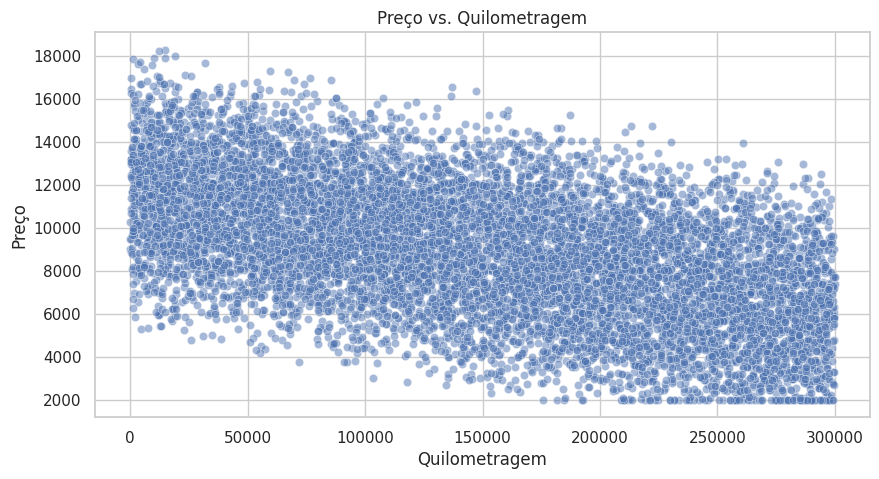

In [29]:
2. Qual é a relação entre a quilometragem e o preço?
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Mileage"], y=df["Price"], alpha=0.5)
plt.title("Preço vs. Quilometragem")
plt.xlabel("Quilometragem")
plt.ylabel("Preço")
plt.show()

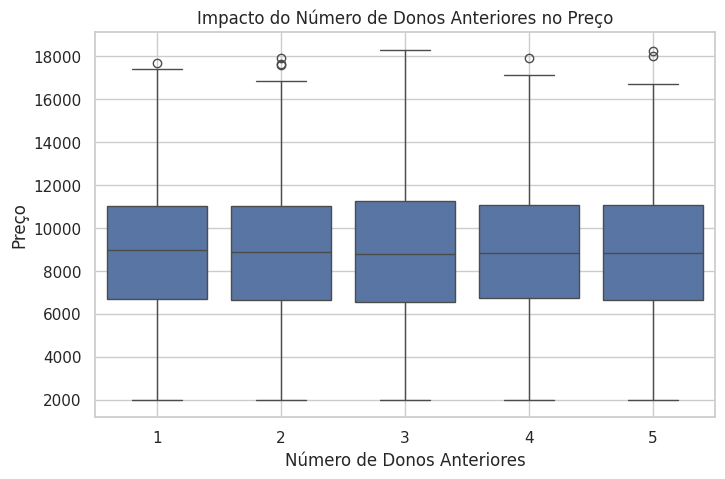

In [35]:
# 3. O número de donos anteriores afeta o preço de revenda?
plt.figure(figsize=(8, 5))
sns.boxplot(x='Owner_Count', y='Price', data=df)
plt.title('Impacto do Número de Donos Anteriores no Preço')
plt.xlabel('Número de Donos Anteriores')
plt.ylabel('Preço')
plt.grid(True)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
# Pré-processamento dos dados
# Convertendo variáveis categóricas com OneHotEncoder
categorical_cols = ['Brand', 'Model', 'Fuel_Type', 'Transmission']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]),
                            columns=encoder.get_feature_names_out(categorical_cols))

In [20]:
# Concatenar colunas codificadas e remover originais
df = pd.concat([df.drop(categorical_cols, axis=1), encoded_cols], axis=1)


In [21]:
# Separar features e target
X = df.drop('Price', axis=1)
y = df['Price']

In [22]:
# Normalização das features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Seleção de Features usando SelectKBest
selector = SelectKBest(f_regression, k=10)  # Selecionar as 10 melhores features
X_selected = selector.fit_transform(X_scaled, y)

In [24]:
# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [25]:
# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predições
y_pred = model.predict(X_test)

In [27]:
# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(20.430087391341388, 4509.022131685068, 0.9995204777272669)

In [ ]:
# Resultados da Avaliação do Modelo:
# Foi utilizado o método SelectKBest para selecionar as 10 melhores variáveis.
# O Modelo utilizado foi o de Regressão Linear.


# Resultados das métricas de avaliação:

# MAE (Erro Médio Absoluto): 20.43
# → Em média, o modelo erra o valor previsto do preço dos carros por aproximadamente 20,43 unidades monetárias.

# MSE (Erro Médio Quadrático): 4509.02
# → O erro quadrático médio indica que há algumas variações elevadas, mas ainda dentro de um nível razoável.

# R² (Coeficiente de Determinação): 0.9995
# → O modelo explica 99.95% da variação nos preços dos carros, o que indica um excelente ajuste.

In [ ]:
#Conclusões
# O modelo apresenta um desempenho muito bom, com alto valor de R² e baixo erro médio absoluto.